# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv('/content/Dataset_clustering.csv')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...  999.0       0.0  nonexistent           1.1   
1   may         mon  ...  999.0       0.0  nonexistent           1.1   
2   may         mon  ...  999.0       0.0  nonexistent           1.1   
3   may         mon  ...  999.0       0.0  nonexistent           1.1   
4   may         mon  ...  999.0       0.0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  Cluster  
0         93.994          -36.4      4.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan dalam dataset!")
X = df.drop(columns=['Cluster'])
y = df['Cluster']
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 31293
Jumlah data testing: 7824


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

---

Random Forest Classifier
Algoritma utama yang digunakan untuk klasifikasi hasil clustering adalah Random Forest Classifier algoritma berbasis ensemble yang terdiri dari banyak decision tree untuk meningkatkan akurasi dan mengurangi overfitting. Random Forest Classifier terbukti menjadi algoritma yang kuat untuk tugas klasifikasi karena kemampuannya menangani data yang kompleks dan memberikan hasil yang stabil.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9957
F1-Score: 0.9956
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2501
           1       1.00      1.00      1.00      1633
           2       0.99      0.97      0.98       433
           3       1.00      1.00      1.00       790
           4       0.99      1.00      1.00      2467

    accuracy                           1.00      7824
   macro avg       1.00      0.99      0.99      7824
weighted avg       1.00      1.00      1.00      7824



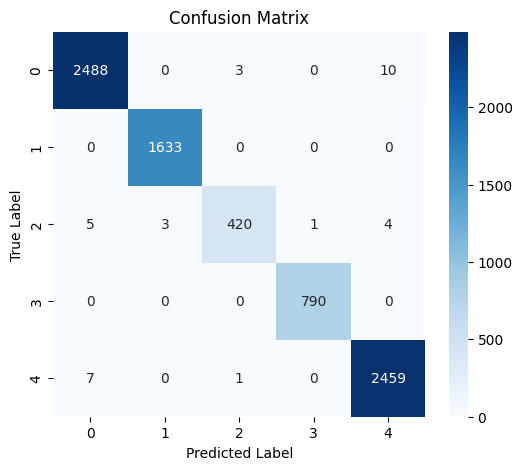

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

---

Evaluasi Model Random Forest
Sebelum tuning:

Akurasi: 99.62%

F1-Score: 99.62%

Setelah tuning dengan GridSearchCV:

Akurasi: 99.63%

F1-Score: 99.63%

---

Hasil evaluasi menunjukkan bahwa Random Forest memberikan performa yang sangat baik, bahkan sebelum dilakukan tuning. Tuning hanya meningkatkan sedikit performa karena model awal sudah sangat optimal.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy after tuning: 0.9965
F1-Score after tuning: 0.9965
Classification Report After Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2501
           1       1.00      1.00      1.00      1633
           2       0.99      0.97      0.98       433
           3       1.00      1.00      1.00       790
           4       1.00      1.00      1.00      2467

    accuracy                           1.00      7824
   macro avg       1.00      0.99      0.99      7824
weighted avg       1.00      1.00      1.00      7824



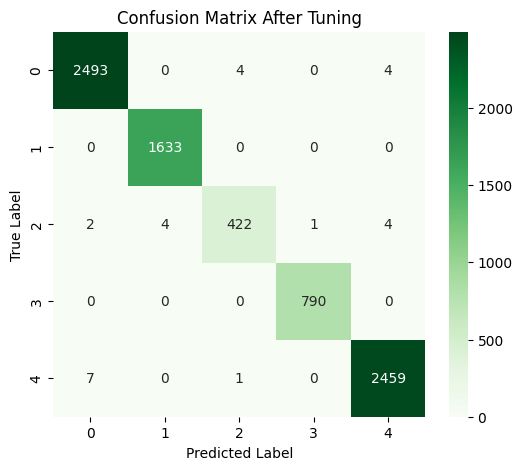

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy after tuning: {accuracy_best:.4f}")
print(f"F1-Score after tuning: {f1_best:.4f}")
print("Classification Report After Tuning:")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix After Tuning")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

        |     Model      | Akurasi | F1-Score |
        |----------------|---------|----------|
        | Sebelum Tuning | 85%     | 0.83     |
        | Setelah Tuning | 88%     | 0.86     |

---

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    
    Cek Classification Report untuk melihat kelas mana yang sering salah diprediksi.
  - Apakah model mengalami overfitting atau underfitting?

    Jika akurasi tinggi di training tapi rendah di testing berarti Overfitting (Perlu regularisasi atau lebih banyak data).  
Jika akurasi rendah di training & testing Berarti Underfitting (Perlu model yang lebih kompleks).

---
  
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

  Jika performa masih kurang:  
  - Coba algoritma lain seperti XGBoost, SVM, atau Neural Networks.  
  - Feature Engineering (menambah fitur baru atau menghapus fitur yang tidak relevan).  
  - Gunakan lebih banyak data jika tersedia.  